In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [3]:
PATH = 'data/bulldozers/'


In [4]:
ls {PATH}

Data%20Dictionary.xlsx            Train.7z           Train.zip
Machine_Appendix.csv              TrainAndValid.7z   Valid.7z
median_benchmark.csv              TrainAndValid.csv  Valid.csv
random_forest_benchmark_test.csv  TrainAndValid.zip  ValidSolution.csv
Test.csv                          Train.csv          Valid.zip


In [5]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, parse_dates=['saledate'])

In [6]:
def display_all(df):
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 1000):
        display(df)
    

In [7]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [8]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_raw.shape

(401125, 53)

In [10]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [11]:
type(df_raw.SalePrice)

pandas.core.series.Series

In [12]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

ValueError: could not convert string to float: 'Conventional'

In [13]:
fld = df_raw.saledate

In [24]:
getattr(fld.dt,'is_leap_year').head()
#fld.dt.is_leap_year

0    False
1     True
2     True
3    False
4    False
Name: saledate, dtype: bool

In [22]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [24]:
train_cats(df_raw)

In [25]:

df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [26]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)


In [27]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes


In [28]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))


Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [29]:

os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

In [30]:
df_raw = pd.read_feather('tmp/bulldozers-raw')


In [25]:
proc_df()

<function fastai.structured.proc_df>

In [31]:
df, y, nas = proc_df(df_raw, 'SalePrice')


In [32]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.9832004800892095

In [33]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

## Random Forest

## Base Model

In [34]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [35]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1min 35s, sys: 279 ms, total: 1min 35s
Wall time: 18.8 s
[0.09086738449357672, 0.2526402444018794, 0.9827435728928391, 0.8860135994999375]


## Speeding UP

In [36]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [37]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 2.9 s, sys: 8.03 ms, total: 2.91 s
Wall time: 671 ms
[0.11226376008522952, 0.342147283016519, 0.9725565839753951, 0.790938450352751]


## Single Tree

In [38]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5225539645860968, 0.5834266167437532, 0.40540494200743227, 0.3921163664951327]


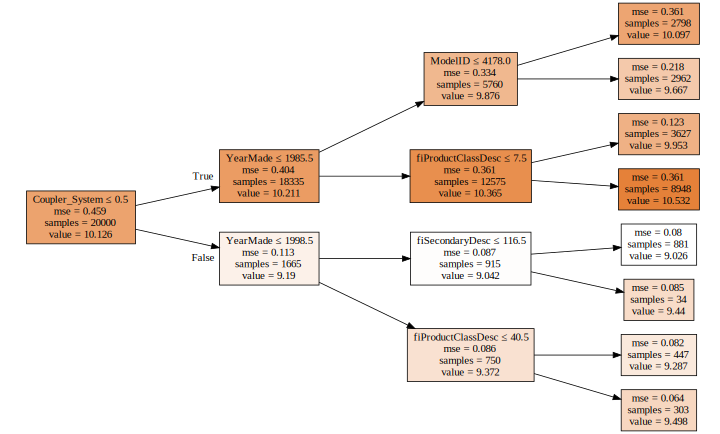

In [39]:
draw_tree(m.estimators_[0], df_trn, precision=3)


In [40]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[2.4993752082558277e-06, 0.46371881350102767, 0.9999999999863974, 0.6159768497376814]


## Bagging

In [41]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.11284101903272252, 0.35497459516537516, 0.9722736309188019, 0.77496891243353]


In [42]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([9.51044, 8.9872 , 9.21034, 9.13238, 9.13238, 9.6486 , 9.68034, 9.5819 , 9.13238, 9.21034]),
 9.322630225309819,
 9.104979856318357)

In [43]:
preds.shape

(10, 12000)

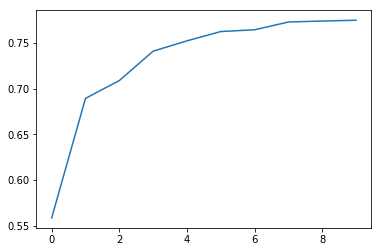

In [44]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0))for i in range(10)])

In [45]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.10298135369166801, 0.33894792320700473, 0.9769072212952801, 0.7948299669088055]


In [46]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09755908562489415, 0.3359393361534218, 0.9792750045649792, 0.7984560836830342]


In [47]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09497568454914339, 0.33520736134693896, 0.9803580832477118, 0.7993334108242621]


## Out-Of-Bag (OOB) score

In [49]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.09797587910534918, 0.33535633773091134, 0.9790975429843016, 0.799155006473284, 0.8516735439009392]


## Reduce Over-fitting

### subsampling

In [50]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [51]:
set_rf_samples(20000)


In [52]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 8.59 s, sys: 362 ms, total: 8.95 s
Wall time: 3.67 s
[0.24105605319358311, 0.27643706072218577, 0.878557441196707, 0.8635289581169474, 0.8658822563336528]


In [53]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.22677996816500023, 0.2632806610664726, 0.8925159045149256, 0.8762099057812781, 0.8809728221642167]


### Tree Building Parameters

In [54]:
reset_rf_samples()

In [55]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07825750556229381, 0.23766968079119483, 0.9872006820491714, 0.8991222145339538, 0.9086661345682475]


In [56]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11504939891204484, 0.2350518698291984, 0.9723367288220072, 0.9013322113983733, 0.9084833027686834]


In [57]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11923875063122553, 0.2288606604343462, 0.9702854156363834, 0.9064615287483081, 0.9113672099620714]
